In [1]:
#Getting the main package library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

#Getting word cloud library
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

#Getting nltk library for data preprocessing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

#Getting scikit learn library for evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

#Library for Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Library for KNN
from sklearn.neighbors import KNeighborsClassifier

#Library for Multinomial NB
from sklearn.naive_bayes import MultinomialNB

#Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Library for SVC
from sklearn.svm import SVC

#Library for Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

#Library for MLP
from sklearn.neural_network import MLPClassifier

[nltk_data] Downloading package punkt to C:\Users\Chun
[nltk_data]     Kit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Chun
[nltk_data]     Kit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Data Collection

In [2]:
df = pd.read_csv('Reviews.csv')

# Data Initial Exploration

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

In [5]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [7]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
print('Number of duplicated reviews')
len(df[df.duplicated(subset={"UserId","ProfileName","Time","Text"})])

Number of duplicated reviews


174521

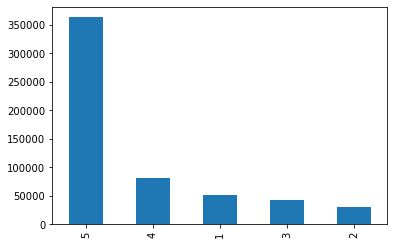

In [9]:
#Total number of ratings given by users
ax = df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score.png");

# Data Cleaning

In [10]:
#Sorting data according to ProductId in ascending order
sorted_df = df.sort_values('ProductId', axis = 0, ascending = True, inplace = False, kind = 'quicksort', na_position = 'last')

In [11]:
#Remove duplicate entries
df = sorted_df.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"}, keep = 'first', inplace = False)
df.shape

(393933, 10)

In [12]:
#Drop null values
df = df.dropna()

In [13]:
#Showing the number of entries remaining and the number of columns
df.shape

(393919, 10)

In [14]:
#Showing the number of columns in the dataset
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [15]:
#Showing one of the examples of the columns that is not needed
df['ProductId'].value_counts()

B007JFMH8M    912
B0026RQTGE    630
B003B3OOPA    623
B001EO5Q64    566
B000VK8AVK    562
             ... 
B0083WY8KU      1
B002SWLOZ8      1
B008AMRLDY      1
B008TSVXWE      1
B0058DLSKK      1
Name: ProductId, Length: 67557, dtype: int64

In [16]:
#Remove unnecessary columns
df = df.drop(columns = ['Id', 'ProductId', 'UserId','ProfileName','Time','Summary'])

In [17]:
#Showing the details of the current dataset after initial cleaning
df

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text
150528,0,1,4,In June<br />I saw a charming group<br />of ro...
150506,1,1,4,This is a fun way for children to learn their ...
150505,1,1,4,"I grew up reading these Sendak books, and watc..."
150504,1,1,4,Get the movie or sound track and sing along wi...
150503,1,1,4,A very entertaining rhyming story--cleaver and...
...,...,...,...,...
193171,0,0,5,FTS Zero is the best sweetener I have ever tri...
188388,0,0,5,You have to try this sauce to believe it! It s...
221794,1,1,5,I bought this Hazelnut Paste (Nocciola Spread)...
5702,0,0,5,Purchased this product at a local store in NY ...


In [18]:
#Conversion of reviews into positive and negative based on Score
## 1 for positive reviews where score is greater than 2, and 0 for negative reviews if score is 2 or less than 2
df['Score']=df['Score'].apply(lambda x:(0 if x<3 else 1))
df

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Text
150528,0,1,1,In June<br />I saw a charming group<br />of ro...
150506,1,1,1,This is a fun way for children to learn their ...
150505,1,1,1,"I grew up reading these Sendak books, and watc..."
150504,1,1,1,Get the movie or sound track and sing along wi...
150503,1,1,1,A very entertaining rhyming story--cleaver and...
...,...,...,...,...
193171,0,0,1,FTS Zero is the best sweetener I have ever tri...
188388,0,0,1,You have to try this sauce to believe it! It s...
221794,1,1,1,I bought this Hazelnut Paste (Nocciola Spread)...
5702,0,0,1,Purchased this product at a local store in NY ...


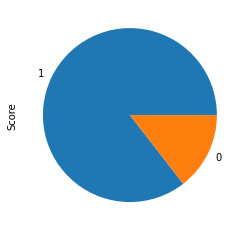

In [19]:
piechart = df.Score.value_counts().plot(kind='pie')
fig1 = ax.get_figure()
fig1.savefig("score1.png");

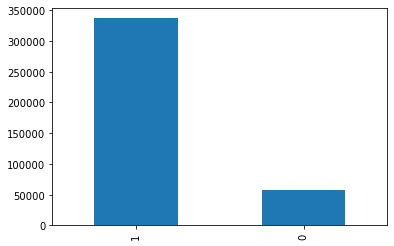

In [20]:
piechart = df.Score.value_counts().plot(kind='bar')
fig1 = ax.get_figure()
fig1.savefig("score2.png");

In [21]:
df.Score.value_counts()

1    336817
0     57102
Name: Score, dtype: int64

In [22]:
#Rename the text column to Review
df=df.rename(columns={'Text':'Review'})

In [23]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Review
150528,0,1,1,In June<br />I saw a charming group<br />of ro...
150506,1,1,1,This is a fun way for children to learn their ...
150505,1,1,1,"I grew up reading these Sendak books, and watc..."
150504,1,1,1,Get the movie or sound track and sing along wi...
150503,1,1,1,A very entertaining rhyming story--cleaver and...


In [24]:
#get a sample to reduce the size of data 
df_sample=df.groupby('Score').apply(lambda x: x.sample(n=10000)).reset_index(drop = True)
df_sample['Score'].value_counts()

0    10000
1    10000
Name: Score, dtype: int64

In [25]:
df=df_sample

# Data Preprocessing

## Removal of numeric words and HTML tags

In [26]:
l2 = []
for text in df['Review']:
    text = re.sub(r'[0-9]+', '', str(text)) # remove numbers from text
    text = re.sub('http', '', str(text)) # remove links tags
    text = re.sub(r'^https?:\/\/.*[\r\n]--*_', '', str(text)) # remove brackets and slashes
    text = re.sub(r'<br /><-->', '', text, flags = re.DOTALL)
    text = re.sub(r'[^\w\s]', '', text, flags = re.DOTALL) #remove everything except words and space
    text = re.sub(r'_','',text) #remove underscore
    text = re.sub(r'[0-9]','',text)
    l2.append(text)
df['Review'] = l2
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Review
0,4,7,0,I have tried many brands of coconut water incl...
1,1,1,0,This is just a strange product It comes from T...
2,1,1,0,Life is too short to drink bad coffee and thes...
3,13,15,0,This is not the original Swiss Muesli that mad...
4,0,0,0,It may not be fair for me to review this I se...


In [27]:
df['Review']

0        I have tried many brands of coconut water incl...
1        This is just a strange product It comes from T...
2        Life is too short to drink bad coffee and thes...
3        This is not the original Swiss Muesli that mad...
4        It may not be fair for me to review this  I se...
                               ...                        
19995    These treats are amazing  I moved into a new c...
19996    I ordered  different types of mint chocolate i...
19997    I bought these to throw in the my sons lunch b...
19998    We are using the Easy Green Automatic Sprouter...
19999    I cant weigh in on the original version of thi...
Name: Review, Length: 20000, dtype: object

## Tokenization of reviews

In [28]:
l3 = []
for text in df['Review']:
    tokenized_text = nltk.word_tokenize(text)
    l3.append(tokenized_text)
    
df['tokenized_Review'] = l3

In [29]:
df.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Review,tokenized_Review
0,4,7,0,I have tried many brands of coconut water incl...,"[I, have, tried, many, brands, of, coconut, wa..."
1,1,1,0,This is just a strange product It comes from T...,"[This, is, just, a, strange, product, It, come..."
2,1,1,0,Life is too short to drink bad coffee and thes...,"[Life, is, too, short, to, drink, bad, coffee,..."
3,13,15,0,This is not the original Swiss Muesli that mad...,"[This, is, not, the, original, Swiss, Muesli, ..."
4,0,0,0,It may not be fair for me to review this I se...,"[It, may, not, be, fair, for, me, to, review, ..."


In [30]:
df = df.reset_index()

In [31]:
df

,index,HelpfulnessNumerator,HelpfulnessDenominator,Score,Review,tokenized_Review
0,0,4,7,0,I have tried many brands of coconut water incl...,"[I, have, tried, many, brands, of, coconut, wa..."
1,1,1,1,0,This is just a strange product It comes from T...,"[This, is, just, a, strange, product, It, come..."
2,2,1,1,0,Life is too short to drink bad coffee and thes...,"[Life, is, too, short, to, drink, bad, coffee,..."
3,3,13,15,0,This is not the original Swiss Muesli that mad...,"[This, is, not, the, original, Swiss, Muesli, ..."
4,4,0,0,0,It may not be fair for me to review this I se...,"[It, may, not, be, fair, for, me, to, review, ..."
...,...,...,...,...,...,...
19995,19995,0,0,1,These treats are amazing I moved into a new c...,"[These, treats, are, amazing, I, moved, into, ..."
19996,19996,0,0,1,I ordered different types of mint chocolate i...,"[I, ordered, different, types, of, mint, choco..."
19997,19997,0,0,1,I bought these to throw in the my sons lunch b...,"[I, bought, these, to, throw, in, the, my, son..."
19998,19998,0,0,1,We are using the Easy Green Automatic Sprouter...,"[We, are, using, the, Easy, Green, Automatic, ..."


## Stopwords removal

In [32]:
l4 = []
for i in range(len(df['tokenized_Review'])):
    tokens = df['tokenized_Review'][i]
    stopwordremove = [word for word in tokens if word not in stopwords.words('english')]
    l4.append(stopwordremove)

df['Review_without_stopwords'] = l4

In [33]:
df.head()

,index,HelpfulnessNumerator,HelpfulnessDenominator,Score,Review,tokenized_Review,Review_without_stopwords
0,0,4,7,0,I have tried many brands of coconut water incl...,"[I, have, tried, many, brands, of, coconut, wa...","[I, tried, many, brands, coconut, water, inclu..."
1,1,1,1,0,This is just a strange product It comes from T...,"[This, is, just, a, strange, product, It, come...","[This, strange, product, It, comes, Taiwan, mi..."
2,2,1,1,0,Life is too short to drink bad coffee and thes...,"[Life, is, too, short, to, drink, bad, coffee,...","[Life, short, drink, bad, coffee, beans, make,..."
3,3,13,15,0,This is not the original Swiss Muesli that mad...,"[This, is, not, the, original, Swiss, Muesli, ...","[This, original, Swiss, Muesli, made, company,..."
4,4,0,0,0,It may not be fair for me to review this I se...,"[It, may, not, be, fair, for, me, to, review, ...","[It, may, fair, review, I, sent, Uncle, Johnny..."


## Stemming

In [34]:
stemming = nltk.PorterStemmer()
l5 = []
from nltk.corpus import stopwords
for i in range(len(df['Review_without_stopwords'])):
    rev = df['Review_without_stopwords'][i]
    stem = [stemming.stem(word) for word in rev]
    l5.append(stem)
    
df['stemmed_Reviews'] = l5

In [35]:
df.head()

,index,HelpfulnessNumerator,HelpfulnessDenominator,Score,Review,tokenized_Review,Review_without_stopwords,stemmed_Reviews
0,0,4,7,0,I have tried many brands of coconut water incl...,"[I, have, tried, many, brands, of, coconut, wa...","[I, tried, many, brands, coconut, water, inclu...","[i, tri, mani, brand, coconut, water, includ, ..."
1,1,1,1,0,This is just a strange product It comes from T...,"[This, is, just, a, strange, product, It, come...","[This, strange, product, It, comes, Taiwan, mi...","[thi, strang, product, it, come, taiwan, might..."
2,2,1,1,0,Life is too short to drink bad coffee and thes...,"[Life, is, too, short, to, drink, bad, coffee,...","[Life, short, drink, bad, coffee, beans, make,...","[life, short, drink, bad, coffe, bean, make, b..."
3,3,13,15,0,This is not the original Swiss Muesli that mad...,"[This, is, not, the, original, Swiss, Muesli, ...","[This, original, Swiss, Muesli, made, company,...","[thi, origin, swiss, muesli, made, compani, fa..."
4,4,0,0,0,It may not be fair for me to review this I se...,"[It, may, not, be, fair, for, me, to, review, ...","[It, may, fair, review, I, sent, Uncle, Johnny...","[it, may, fair, review, i, sent, uncl, johnni,..."


## Lemmatization

In [36]:
lemmatizer = WordNetLemmatizer()
l6 = []
from nltk.corpus import stopwords
for i in range(len(df['stemmed_Reviews'])):
    tweet  = df['stemmed_Reviews'][i]
    stem = [lemmatizer.lemmatize(word) for word in tweet]
    l6.append(stem)
    
df['lemmatized_Reviews'] = l6

In [37]:
df.head()

,index,HelpfulnessNumerator,HelpfulnessDenominator,Score,Review,tokenized_Review,Review_without_stopwords,stemmed_Reviews,lemmatized_Reviews
0,0,4,7,0,I have tried many brands of coconut water incl...,"[I, have, tried, many, brands, of, coconut, wa...","[I, tried, many, brands, coconut, water, inclu...","[i, tri, mani, brand, coconut, water, includ, ...","[i, tri, mani, brand, coconut, water, includ, ..."
1,1,1,1,0,This is just a strange product It comes from T...,"[This, is, just, a, strange, product, It, come...","[This, strange, product, It, comes, Taiwan, mi...","[thi, strang, product, it, come, taiwan, might...","[thi, strang, product, it, come, taiwan, might..."
2,2,1,1,0,Life is too short to drink bad coffee and thes...,"[Life, is, too, short, to, drink, bad, coffee,...","[Life, short, drink, bad, coffee, beans, make,...","[life, short, drink, bad, coffe, bean, make, b...","[life, short, drink, bad, coffe, bean, make, b..."
3,3,13,15,0,This is not the original Swiss Muesli that mad...,"[This, is, not, the, original, Swiss, Muesli, ...","[This, original, Swiss, Muesli, made, company,...","[thi, origin, swiss, muesli, made, compani, fa...","[thi, origin, swiss, muesli, made, compani, fa..."
4,4,0,0,0,It may not be fair for me to review this I se...,"[It, may, not, be, fair, for, me, to, review, ...","[It, may, fair, review, I, sent, Uncle, Johnny...","[it, may, fair, review, i, sent, uncl, johnni,...","[it, may, fair, review, i, sent, uncl, johnni,..."


## Filter remaining characters in the text

In [38]:
blacklist = ['.',';','!','...',',','i']

df['lemmatized_Reviews']=df['lemmatized_Reviews'].apply(lambda x: [i for i in x if i not in blacklist])

# EDA

## Word cloud

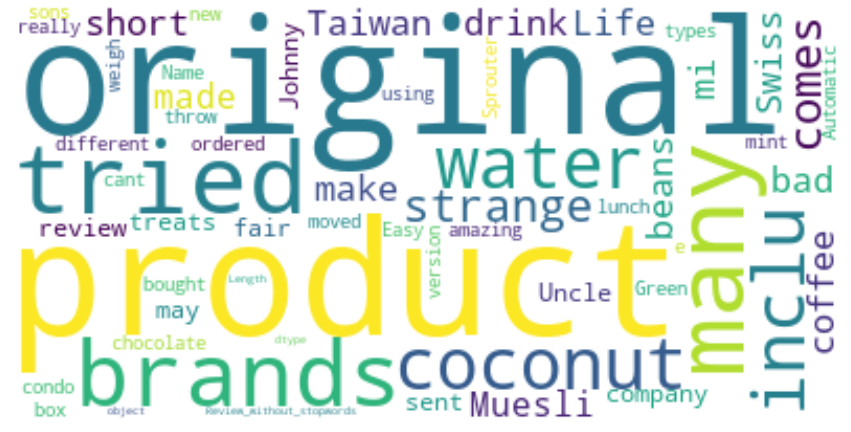

In [39]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

text = df['Review_without_stopwords']
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(str(text))
plt.figure( figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## Common words

In [40]:
#Words that appears most of the times in negative reviews or score equals to 0
c1 = df[df['Score']==0]
top = Counter([item for sublist in c1['Review_without_stopwords'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
0,I,29430
1,br,5052
2,like,5003
3,The,4567
4,product,3836
5,taste,3773
6,would,3022
7,one,2905
8,It,2767
9,This,2453


In [41]:
#Words that appears most of the times in positive reviews or score equals to 1
c1 = df[df['Score']==1]
top = Counter([item for sublist in c1['Review_without_stopwords'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,I,24315
1,br,4606
2,like,3956
3,The,3786
4,good,3229
5,This,2777
6,taste,2700
7,great,2645
8,It,2595
9,one,2542


## Convert text to vector for modeling

In [42]:
#Join all the words again to make a sentence
l = []
for i in df['lemmatized_Reviews']:
    str1 = " " 
    t = str1.join(i)
    l.append(t)
df['final'] = l  

In [43]:
#Use bag of words to convert text to vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['final'])
b = vectorizer.get_feature_names()

#Creating a dataframe of the array which was converted into a vector and concatinating it with other features
df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [44]:
#Separate reviews and other columns
remaining = df[['HelpfulnessNumerator','HelpfulnessDenominator','Score']]
df_final = pd.concat([df1,remaining],axis = 1)

In [45]:
#Drop cat col, as it is output column
X = df_final.drop(['Score'],axis=1)
y = df_final['Score']

In [46]:
X

,aa,aaa,aaaaa,aaabr,aafco,aain,ab,aback,abandon,abandonedbr,...,zoombi,zotz,zowwi,zucchini,zuchinni,zuke,zurich,çay,HelpfulnessNumerator,HelpfulnessDenominator
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,15
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# Data Modeling

In [48]:
def modelEvaluation(predictions, y_test_set, model_name):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True, fmt='g',cmap='viridis')
    plt.tight_layout()
    plt.show()
    fpr, tpr, thresholds = metrics.roc_curve(y_test_set, predictions, pos_label=2)
    auc=metrics.auc(fpr, tpr)
    print('AUC',auc)
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions, average='macro'),
              recall_score(y_test_set, predictions, average='macro'),f1_score(y_test_set, predictions, average='macro')]
    return results

========== Decision Tree Classifier ==========

Accuracy on validation set: 0.7093

Classification report : 
               precision    recall  f1-score   support

           0       0.72      0.70      0.71      2019
           1       0.70      0.72      0.71      1981

    accuracy                           0.71      4000
   macro avg       0.71      0.71      0.71      4000
weighted avg       0.71      0.71      0.71      4000


Confusion Matrix : 
 [[1412  607]
 [ 556 1425]]


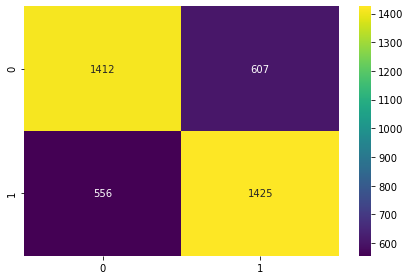

AUC nan


In [49]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
results_dtc = modelEvaluation(y_pred, y_test, "Decision Tree Classifier")

========== KNN Classifier ==========

Accuracy on validation set: 0.6733

Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.51      0.61      2019
           1       0.63      0.84      0.72      1981

    accuracy                           0.67      4000
   macro avg       0.69      0.67      0.67      4000
weighted avg       0.70      0.67      0.66      4000


Confusion Matrix : 
 [[1037  982]
 [ 325 1656]]


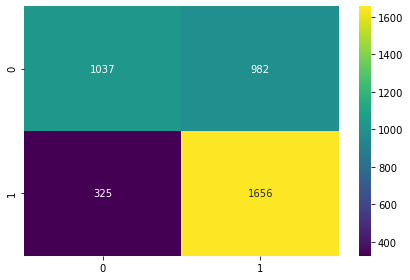

AUC nan


In [50]:
dtc = KNeighborsClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
results_dtc = modelEvaluation(y_pred, y_test, "KNN Classifier")

========== Multinomial NaiveBayes ==========

Accuracy on validation set: 0.8175

Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      2019
           1       0.81      0.83      0.82      1981

    accuracy                           0.82      4000
   macro avg       0.82      0.82      0.82      4000
weighted avg       0.82      0.82      0.82      4000


Confusion Matrix : 
 [[1620  399]
 [ 331 1650]]


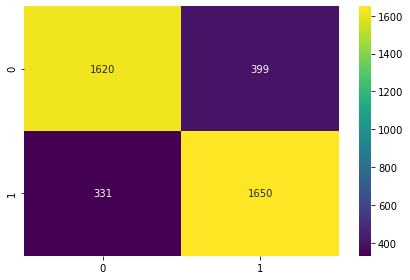

AUC nan


In [51]:
dtc = MultinomialNB()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
results_dtc = modelEvaluation(y_pred, y_test, "Multinomial NaiveBayes")

========== Logistic Regression ==========

Accuracy on validation set: 0.8377

Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      2019
           1       0.83      0.85      0.84      1981

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000


Confusion Matrix : 
 [[1671  348]
 [ 301 1680]]


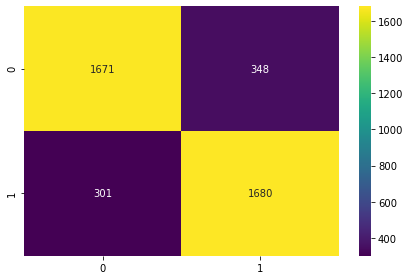

AUC nan


In [52]:
dtc =  LogisticRegression()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
results_dtc = modelEvaluation(y_pred, y_test, "Logistic Regression")

========== Support Vector Classifier ==========

Accuracy on validation set: 0.8425

Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      2019
           1       0.84      0.84      0.84      1981

    accuracy                           0.84      4000
   macro avg       0.84      0.84      0.84      4000
weighted avg       0.84      0.84      0.84      4000


Confusion Matrix : 
 [[1705  314]
 [ 316 1665]]


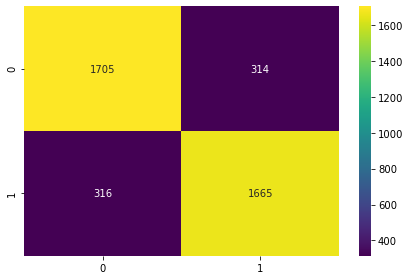

AUC nan


In [53]:
from sklearn.svm import SVC

dtc =  SVC()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
results_dtc = modelEvaluation(y_pred, y_test, "Support Vector Classifier")

========== Gradient Boosting Classifier ==========

Accuracy on validation set: 0.7913

Classification report : 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2019
           1       0.78      0.81      0.79      1981

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000


Confusion Matrix : 
 [[1559  460]
 [ 375 1606]]


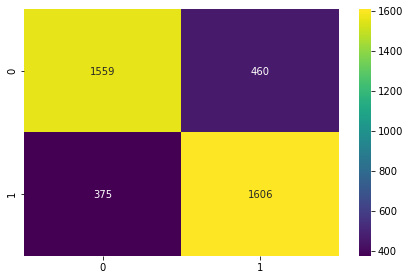

AUC nan


In [54]:
dtc =  GradientBoostingClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
results_dtc = modelEvaluation(y_pred, y_test, "Gradient Boosting Classifier")

========== MLP Classifier ==========

Accuracy on validation set: 0.8120

Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      2019
           1       0.81      0.82      0.81      1981

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000


Confusion Matrix : 
 [[1631  388]
 [ 364 1617]]


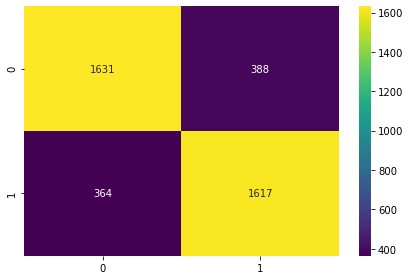

AUC nan


In [55]:
dtc = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
results_dtc = modelEvaluation(y_pred, y_test, "MLP Classifier")